In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
dfcreation = pd.read_csv(filepath_or_buffer = './TABLE_CREATION_VF.csv')

In [3]:
dfdefaut = pd.read_csv(filepath_or_buffer = './TABLE_DEFAUT_VF.csv')

In [4]:
dfpib = pd.read_csv(filepath_or_buffer = './TABLE_PIB_CLEAN.csv')

In [5]:
dfchomage = pd.read_csv(filepath_or_buffer = './TABLE_CHOMAGE_VF.csv')

In [6]:
print(dfchomage.columns)

Index(['Code', 'Libellé', 'trimestre', 'chomage'], dtype='object')


In [8]:
print(dfpib.columns)

Index(['Région', 'Année', 'PIB_VAL', 'PIB_VOL', 'PIB_HAB', 'PIB_EMP'], dtype='object')


In [51]:
print(dfcreation.columns)

Index(['Secteur', 'trimestre', 'code_region', 'code_dep', 'nombre_creation',
       'Quartile_MOY', 'Quartile_CV'],
      dtype='object')


In [22]:
#dfcreation[annee] = 
#dfcreation = dfcreation.rename(columns={'trimestre': 'annee'})

In [10]:
print(dfdefaut.columns)

Index(['Secteur', 'trimestre', 'code_region', 'code_dep', 'nombre_defaut'], dtype='object')


In [13]:
dfdefaut = dfdefaut.rename(columns={'trimestre': 'annee'})

In [52]:
region_code = 1
dfcreation1 = dfcreation[dfcreation['code_region'] == region_code]
dfcreation1.sort_values('trimestre', inplace=True)
#dfcreation1.sort_values('Secteur', inplace=True)
#dfcreation1 = dfcreation1.groupby('Secteur')['nombre_creation'].sum()
#dfcreation1 = dfcreation1.groupby('annee')['nombre_creation'].sum()
dfcreation1.head()


/tmp/ipykernel_4780/2573838445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcreation1.sort_values('trimestre', inplace=True)


,Secteur,trimestre,code_region,code_dep,nombre_creation,Quartile_MOY,Quartile_CV
0,Activites de services administratifs et de sou...,2017,1,971,279,3,4
26571,Sante humaine et action sociale,2017,1,971,101,3,1
5736,Activites immobilieres,2017,1,971,149,4,3
15467,Construction,2017,1,971,115,3,2
15998,Construction,2017,1,971,103,3,2


In [53]:
annual_creation_sum = dfcreation1.groupby(['trimestre', 'code_region'])['nombre_creation'].sum().reset_index()

# Afficher les premières lignes des données agrégées
annual_creation_sum.head()


,trimestre,code_region,nombre_creation
0,2017,1,5244
1,2018,1,5701
2,2019,1,6369
3,2020,1,6345
4,2021,1,7623


In [54]:
annual_creation_sum.tail()

,trimestre,code_region,nombre_creation
0,2017,1,5244
1,2018,1,5701
2,2019,1,6369
3,2020,1,6345
4,2021,1,7623


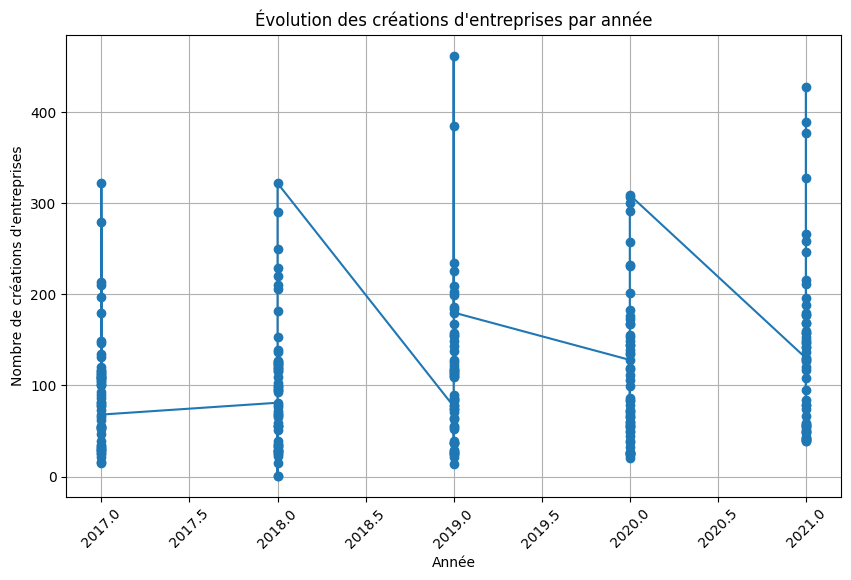

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(dfcreation1['trimestre'], dfcreation1['nombre_creation'], marker='o', linestyle='-')
plt.title("Évolution des créations d'entreprises par année")
plt.xlabel("Année")
plt.ylabel("Nombre de créations d'entreprises")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()